<a href="https://colab.research.google.com/github/marquesgabi/Doutorado/blob/master/PSD_histogram_CNN_B_Amostra8_r_squared_set_9_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 3.7 MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 431, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 431 (delta 80), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (431/431), 165.74 MiB | 28.36 MiB/s, done.
Resolving deltas: 100% (203/203), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [7]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[9] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [8]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 163 (delta 65), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 22.94 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [9]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [10]:
df=Segmenta(img)
Img_Size = 28

In [11]:
print(df)

    Width           0           1  ...         781         782         783
0     199   23.659630   12.210524  ...    0.144214    0.000000    0.000000
1     103  138.383057  141.610138  ...   70.819687   70.543121   70.174194
2     181   86.141853   83.723915  ...   46.017094   31.137541   21.119595
3     184   15.643666   42.573250  ...   24.736294   37.264175   52.614361
4     111   32.395180   33.052753  ...   96.830368   98.672432   99.654167
5     174   34.026428   38.155106  ...  129.197388  135.061432  135.827728
6     128   51.588867   47.212891  ...   25.693359    8.851562    2.413086
7     106   81.850830   80.169815  ...   42.343540   41.600571   38.224281
8     107   92.778236   91.275749  ...   64.123329   62.246834   61.955978
9     154   90.256210   93.033066  ...  104.776863  107.314056  106.702492
10    191   74.077393   79.236458  ...   89.792229   92.054337   91.526451
11    121  105.084152  105.014069  ...  126.205383  131.408585  132.505768
12    116   44.297264   4

In [12]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [13]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 22.09 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [14]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [15]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [16]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 32, 64, 128 '
N1 = 200
N2 = 10

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 2s 76ms/step - loss: 0.5660 - accuracy: 0.7289 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 54ms/step - loss: 0.2987 - accuracy: 0.8980 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 52ms/step - loss: 0.2750 - accuracy: 0.8688 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 51ms/step - loss: 0.2014 - accuracy: 0.9096 - val_loss: 0.6937 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 51ms/step - loss: 0.1140 - accuracy: 0.9563 - val_loss: 0.6953 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 51ms/step - loss: 0.0893 - accuracy: 0.9767 - val_loss: 0.6970 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 52ms/step - loss: 0.0599 - accuracy: 0.9738 - val_loss: 0.6982 - val_accuracy: 0.5102
Epoch 

In [18]:
Y_test = yback(Y_test)

In [19]:
pred_test= model.predict(X_test)
Rows, Cols = pred_test.shape
Prediction =[]
for i in range(Rows):
  if(pred_test[0,0] > pred_test[0,1]):
    Prediction.append(0)
  else:
    Prediction.append(1)
  


data = {'y_true': Y_test,'y_predict': Prediction}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   1
Actual     
0        72
1        75


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
#pred_test

In [21]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[9] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction_02 = model.predict(result)
  Rows, Cols = prediction_02.shape
  Prediction =[]
  for i in range(Rows):
    if(prediction_02[0,0] > prediction_02[0,1]):
      Prediction.append(0)
    else:
      Prediction.append(1)
  loc_grao =[];k=0
  for i in Prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
0   104.0   43.434914   50.031067  ...   59.769234   61.696754   61.551781
1   195.0   48.955109   59.175964  ...   87.651077   76.448242   65.528946
2   128.0  102.390625  110.763672  ...    1.261719    0.370117    0.444336
3   128.0    0.567383    1.719727  ...   41.034180   35.852539   22.966797
4   140.0   67.799995   74.519997  ...   71.080002   72.000000   71.559998
5   178.0   42.075874   25.098473  ...    9.701428    8.841183   10.411693
6   121.0   75.837440   75.715866  ...    0.158732    0.000000    0.000000
7   169.0   82.135262   80.665627  ...   54.697666   57.281258   60.694016
8   102.0   64.841995   58.083817  ...   21.852751   12.712420    4.798540
9   131.0   77.534462   79.864395  ...   40.231106   26.821106   15.360352
10  151.0   82.039696   80.248978  ...   97.346046   99.904663   98.196045
11  143.0    0.000000    0.000000  ...   39.460564   41.162502   41.736221
12  135.0  125.463257  12

In [22]:
Width=np.array(Width_new)

In [23]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 687, done.
remote: Counting objects: 100% (448/448), done.
remote: Compressing objects: 100% (446/446), done.
remote: Total 687 (delta 282), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (687/687), 5.59 MiB | 10.87 MiB/s, done.
Resolving deltas: 100% (419/419), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [24]:
#!git clone https://github.com/ucfilho/marquesgabi_out_2020
!git clone https://github.com/marquesgabi/Doutorado

%cd Doutorado

PSD_imageJ = 'Amostra8.csv' 
PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'
print(PSD_new.head(3))

Cloning into 'Doutorado'...
remote: Enumerating objects: 431, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 431 (delta 80), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (431/431), 165.74 MiB | 27.56 MiB/s, done.
Resolving deltas: 100% (203/203), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/Doutorado
   Unnamed: 0   Area
0           1  0.807
1           2  1.407
2           3  1.177


In [25]:
PSD_new.shape

(99, 2)

In [26]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [27]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,104.0,43.434914,50.031067,65.464508,79.613914,89.809181,95.189354,96.352081,88.757416,84.977814,81.217461,80.665688,94.020714,109.862442,113.724861,102.223381,91.945282,92.929008,95.671608,101.016273,109.460068,130.270721,121.263321,115.679001,105.640549,96.661255,91.846161,87.637573,84.917160,40.750004,46.838760,66.198227,80.232254,92.553261,95.991135,93.748528,87.566574,84.501480,82.142021,83.321014,...,55.710060,54.724857,56.297340,57.247047,55.424564,56.809174,57.294384,58.684914,61.636101,63.245567,66.405334,67.501488,72.005920,71.995567,71.812134,71.507408,69.610947,66.690834,67.402374,68.893494,67.300293,62.825451,62.025154,60.254440,59.785507,58.269238,56.708584,56.775150,57.156807,56.786987,57.313614,57.983734,57.186394,57.571007,58.958588,60.446754,59.415688,59.769234,61.696754,61.551781
1,195.0,48.955109,59.175964,79.698151,81.431015,77.807182,75.206947,73.689240,73.975784,78.468071,81.799088,80.900055,82.629593,84.983940,88.864174,86.892448,79.338577,79.123581,84.940910,87.810051,91.114555,87.053261,50.086895,16.403315,22.160843,27.017412,32.474876,42.980492,59.732628,49.824913,56.295918,79.951195,84.033142,80.556213,77.451569,73.917885,74.069984,75.574074,76.581886,77.243027,...,87.032089,91.447983,104.483765,103.509201,80.852463,68.817757,66.986519,65.236450,57.879505,47.825539,43.517796,41.287106,98.119568,43.135155,40.021149,39.824802,40.855152,43.204395,45.992775,58.829960,76.139763,85.737968,87.755615,84.492020,85.113930,88.559296,87.641006,83.665253,84.450531,90.825966,101.482475,106.611893,101.723373,98.836853,101.666649,100.640640,97.252190,87.651077,76.448242,65.528946
2,128.0,102.390625,110.763672,114.280273,116.224609,116.556641,110.973633,105.530273,104.613281,103.979492,102.663086,102.393555,105.508789,112.567383,115.462891,109.448242,89.305664,64.904297,55.656250,57.569336,58.458984,59.189453,57.431641,56.761719,55.951172,53.748047,50.210938,45.539062,38.642578,112.307617,116.473633,119.007812,120.203125,119.298828,116.447266,108.733398,101.904297,100.302734,99.958008,102.530273,...,31.216797,26.101562,20.961914,21.011719,20.777344,20.072266,17.611328,11.184570,6.726562,3.207031,0.875977,0.519531,50.320312,51.544922,54.710938,57.589844,58.307617,57.253906,57.945312,58.265625,60.357422,61.512695,61.798828,61.610352,59.867188,53.805664,47.415039,42.628906,34.813477,27.379883,21.313477,20.309570,19.755859,16.092773,10.144531,6.057617,3.383789,1.261719,0.370117,0.444336
3,128.0,0.567383,1.719727,2.620117,2.025391,1.000000,0.243164,0.608398,0.678711,0.692383,1.328125,1.034180,1.252930,0.904297,0.562500,1.058594,5.312500,3.615234,1.328125,1.499023,1.380859,1.118164,1.218750,0.825195,0.170898,0.389648,0.293945,0.054688,0.095703,0.020508,0.393555,1.321289,1.423828,1.000000,0.031250,0.663086,0.528320,0.897461,0.420898,0.442383,...,43.023438,47.666016,48.666016,47.324219,46.084961,44.558594,44.301758,43.291016,41.954102,41.436523,38.700195,31.705078,52.443359,53.617188,59.853516,65.923828,66.012695,63.388672,55.144531,42.896484,37.890625,44.108398,49.161133,47.625000,43.520508,44.411133,44.786133,45.388672,44.859375,45.520508,44.828125,45.387695,46.567383,44.507812,42.179688,42.435547,42.061523,41.034180,35.852539,22.966797
4,140.0,67.799995,74.519997,76.080002,74.279999,73.879997,71.680000,70.360001,69.199997,71.080002,71.080002,68.760002,66.239998,66.080002,66.400002,63.199997,61.480000,60.439999,55.439999,54.919998,56.480000,60.840000,68.839996,76.199997,87.799995,115.000000,127.399994,123.119995,116.079994,62.160000,66.000000,67.680000,68.879997,70.279999,72.599998,73.919998,72.000000,72.919998,70.239998,67.000000,...,101.879997,87.320000,58.840000,53.119999,50.840000,49.959999,49.480000,49.959999,57.879997,68.680000,71.839996,72.7

In [28]:
PSD_new.head()

,Unnamed: 0,Area
0,1,0.807
1,2,1.407
2,3,1.177
3,4,1.289
4,5,1.743


In [29]:
#lost_value = float(PSD_new.columns[1])

# Area = np.array(PSD_new.iloc[:,1])
Area = PSD_new['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )
# Area = np.concatenate( (Area, [lost_value] ) )
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [30]:
PSD_new

,Unnamed: 0,Area
0,1,0.807
1,2,1.407
2,3,1.177
3,4,1.289
4,5,1.743
...,...,...
94,28,2.097
95,29,1.871
96,30,1.315
97,31,1.034


In [31]:
PSD_new.iloc[:,1].values

array([0.807, 1.407, 1.177, 1.289, 1.743, 1.425, 2.553, 0.968, 1.43 ,
       0.722, 1.235, 1.058, 1.342, 1.207, 1.682, 1.474, 1.997, 1.187,
       2.082, 2.877, 1.386, 1.176, 0.96 , 1.147, 1.02 , 1.249, 1.704,
       1.602, 1.303, 1.707, 2.264, 1.233, 0.84 , 1.105, 1.343, 0.811,
       2.03 , 1.844, 2.266, 1.472, 1.009, 1.851, 0.941, 2.252, 1.269,
       1.082, 1.065, 1.995, 2.063, 0.969, 1.389, 1.721, 1.355, 1.178,
       1.529, 1.371, 1.423, 2.756, 0.854, 0.811, 0.69 , 1.752, 0.978,
       1.108, 1.149, 0.994, 1.594, 1.492, 1.322, 1.564, 1.29 , 1.057,
       1.193, 1.413, 1.477, 2.21 , 1.27 , 1.865, 1.088, 2.316, 1.855,
       0.882, 1.587, 1.075, 2.179, 1.749, 0.957, 1.24 , 1.586, 2.507,
       1.864, 1.281, 2.137, 1.282, 2.097, 1.871, 1.315, 1.034, 2.095])

In [32]:
X.shape

(490, 784)

<BarContainer object of 6 artists>

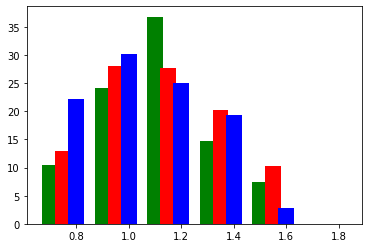

In [33]:
Freq = [10.52631579, 24.21052632, 36.84210526, 14.73684211,  7.36842105, 0.]
Freq2 = [12.90153, 28.11527, 27.66761, 20.21617, 10.34227, 0.]
Freq3 = [22.22489, 30.15078, 25.10463, 19.30926, 2.810434, 0.]
barWidth = 0.25

br1 = range(len(Freq))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)

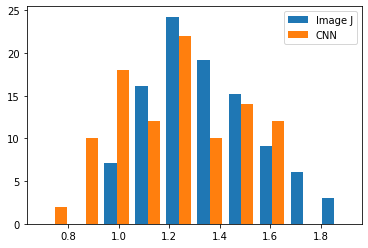

In [34]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.        , 0.        , 0.07070707, 0.23232323, 0.47474747,
         0.66666667, 0.81818182, 0.90909091, 0.96969697, 1.        ],
        [0.02      , 0.12      , 0.3       , 0.42      , 0.64      ,
         0.74      , 0.88      , 1.        , 1.        , 1.        ]]),
 array([0.68557554, 0.80841051, 0.93124549, 1.05408047, 1.17691545,
        1.29975043, 1.42258541, 1.54542039, 1.66825537, 1.79109035,
        1.91392533]),
 <a list of 2 Lists of Patches objects>)

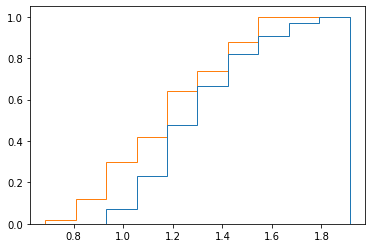

In [35]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.9025425772317928


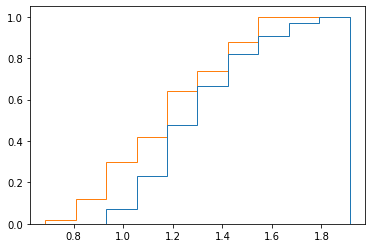

In [36]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [37]:
acc_train = r.history['accuracy'][-1]
acc_test = r.history['val_accuracy'][-1]
loss_train = r.history['loss'][-1]
loss_test = r.history['val_loss'][-1]

In [38]:
df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,
                   'acc train':acc_train,'acc test':acc_test,
                   'loss train':loss_train,'loss test':loss_test,
                   'Details':Description},
                  index= [0])


In [39]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details
0,200,10,0.902543,1.0,0.714286,0.000065,1.359778,"3 layers of Convolution: 32, 64, 128"


<a list of 2 Lists of Patches objects>
[0.68557554 0.80841051 0.93124549 1.05408047 1.17691545 1.29975043
 1.42258541 1.54542039 1.66825537 1.79109035 1.91392533]
[[ 0.          0.          7.07070707 16.16161616 24.24242424 19.19191919
  15.15151515  9.09090909  6.06060606  3.03030303]
 [ 2.         10.         18.         12.         22.         10.
  14.         12.          0.          0.        ]]


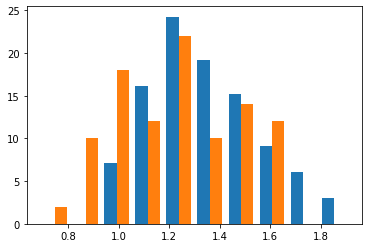

In [40]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [41]:
print(counts.sum())

200.00000000000003


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


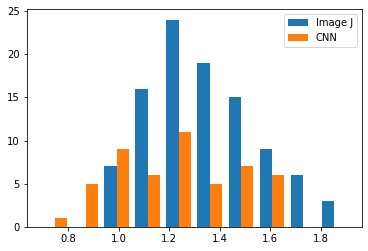

In [42]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [43]:
[Diam1,Diameter_All]

[[1.0136588738827657,
  1.3384498643738487,
  1.2241743928678164,
  1.2810955363139882,
  1.4897169283032898,
  1.3469841688927182,
  1.802936648279376,
  1.1101783096888704,
  1.349345229721172,
  0.9587903583676608,
  1.2539740179716348,
  1.1606409601292735,
  1.3071677279655385,
  1.2396774300177211,
  1.4634168627716928,
  1.369947111730825,
  1.5945718456175375,
  1.2293637946517857,
  1.6281537802488464,
  1.9139253303624628,
  1.3284238815238665,
  1.2236542422631285,
  1.1055812783082735,
  1.2084724894722394,
  1.1396070970426018,
  1.2610615335399848,
  1.4729562736988213,
  1.428191076384995,
  1.2880338220675407,
  1.474252319944901,
  1.697826354277848,
  1.2529582429827641,
  1.034176589165282,
  1.1861406733319428,
  1.3076546595257188,
  1.016167934339702,
  1.607692842495848,
  1.5322707725763225,
  1.6985761120332168,
  1.3690173884396646,
  1.1334454996327699,
  1.5351763407845973,
  1.09458595441189,
  1.6933208363283037,
  1.2711180048559307,
  1.1737313097142148,

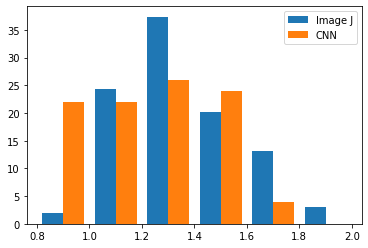

In [44]:
 bins_list = [0.8, 1.0, 1.2, 1.4,1.6, 1.8,2.0]
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts,bins = bins_list)
plt.legend(['Image J','CNN'])

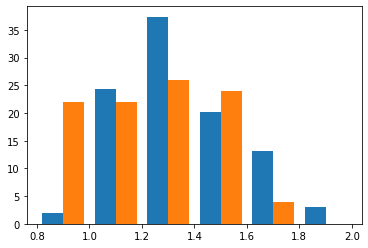

In [45]:
yy = plt.hist(X,weights=wts,bins = bins_list)

In [46]:
yy[0][0]

array([ 2.02020202, 24.24242424, 37.37373737, 20.2020202 , 13.13131313,
        3.03030303])

In [47]:
bins_list

[0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

In [48]:
k =0
for kk in yy[0][0]:
  name = str(bins_list[k])
  df[name] = yy[0][1][k]
  k = k+1

In [49]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details,0.8,1.0,1.2,1.4,1.6,1.8
0,200,10,0.902543,1.0,0.714286,0.000065,1.359778,"3 layers of Convolution: 32, 64, 128",22.0,22.0,26.0,24.0,4.0,0.0


In [50]:
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>